# CS512– Artificial Intelligence

## Lab Assignment - 2 | Due on 10th-March-2022   2400 Hrs     (150 Marks)


**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Armaan Garg, armaan.19CSZ0002@iitrpr.ac.in
*   Shivam Kainth shivam.20csz0006@iitrpr.ac.in

Your submission must be your original work. **Do not indulge in any kind of plagiarism or copying**. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment1 then you should name the colab file as: ABC_2019csx1234_Lab1.ipynb


# Problem 1: The Last Stone Game

The Last Stone is a two player game played over a square grid with stone pebbles of two colours (one for each player). A player is allowed to either place **one** stone or **two** stones in a single play onto the grid. The player who puts **the Last Stone** on the grid **wins** the game. There are some blocked cells in the grid that cannot be used by either players to place any stone. 

Let us assume that you are one of the players and your aim is to win the game (there are only two payoff values possible - +1 for win and -1 for loss). You must have guessed by now that you can be generate your best strategy in this game with the help of Minimax algorithm. 

Information about Minimax:

* Minimax algorithm is a recursive or backtracking algorithm which is used in decision-making and game theory.
* It provides an optimal move for the player assuming that opponent is also playing optimally.
* Minimax algorithm uses recursion to search through the game-tree.
* Minimax algorithm is mostly used for game playing in AI such as Chess, Checkers, tic-tac-toe, Go, and various two-player games. This algorithm computes the minimax decision for the current state.




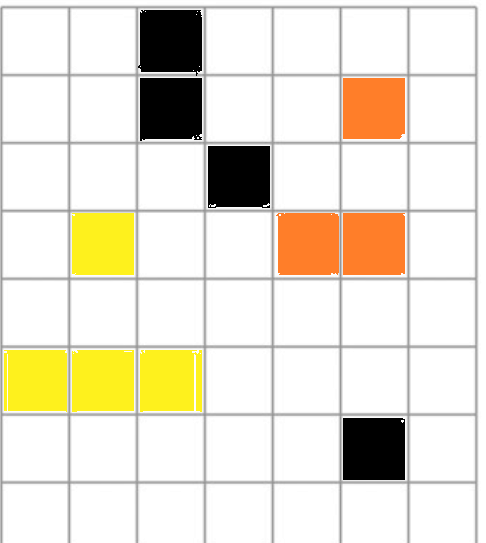


In this image, Red cells denote Player One, Yellow denotes Player Two and Black cells are blocked cells. In current scenario, player yellow has made four moves and now its the Red player's turn.

# Questions
Q.1: Find the best strategy using Minimax algorithm in 5x5 grid with one blocked location. Print the moves in the best strategy. **[10 Marks]**

Q.2: Implement $\alpha - \beta$ pruning to the Minimax algorithm to find the best strategy in 5x5 grid with one blocked location. Print the moves in the best strategy. Comment on the savings achieved with $\alpha - \beta$ pruning as compared to Minimax algorithm in Q.1 **[10 Marks]**

Q.3: Let us assume that the decision on whether a player can place 1 stone or 2 stones is decided based on the toss of a coin. If Head comes then the player can place only 1 stone while a Tail on the coin flip will allow the player to place 2 stones. Find your best strategy in this version of the game using Expecti-Minimax in 5x5 grid with one blocked location. **[15 Marks]**

Q.4: Experiment and analyze the effect of increasing the number of blocked cells from 1 to 5 on the performance of above algorithms (in terms of time, number of nodes explored, size of game tree). **[15 Marks]**


Plot graphs to compare the performance in Q.3 and Q.4

[Bonus] Implement a visualization (GUI) of this game and try to play against your coded algorithms. Report your experience and findings.  **[20 Marks]**

In [1]:
import numpy  as np
import pandas as pd
from itertools import product
from random import sample

### Input to the program: Grid world and cell's location which are blocked. 
#### Output of the program: (0 or 1), 0 denotes player 1 loses, 1 denotes player 1 wins. 

**Sample code for the Last Stone game**

In [2]:
# Basic Grid world structure is defined here
def begin_game(blocked = 1, length = 5):
    global world 
    world=np.zeros([length, length]) #5x5 grid world
    blocked_pos = sample(list(product(np.arange(length), repeat = 2)), blocked)
    for i in range(len(blocked_pos)):
      world[blocked_pos[i][0]][blocked_pos[i][1]] = length
      
begin_game()
world

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0.]])

### The Recursive functions min_value and max_value implemented have been optmized by book-keeping avoiding redundant recursive calls

In [3]:
class stone_game():
  def __init__(self, min_value_list = [0, 0, 0, 0, 0], max_value_list = [0, 0, 0, 0, 0], nodes = 0):
    self.nodes = nodes
    self.min_value_list = min_value_list
    self.max_value_list = max_value_list

  
  def minimax_decision(self, num, player):
    if player == 1:
      action_result = {}
      if (num - 1) >= 0:
        action1_result = self.min_value(num - 1)
        action_result[1] = action1_result
      if (num - 2) >= 0:
        action2_result = self.min_value(num - 2)
        action_result[2] = action2_result
      return max(zip(action_result.values(), action_result.keys()))[1]
    else:
      action_result = {}
      if (num - 1)>=0:
        action1_result = self.max_value(num - 1)
        action_result[1] = action1_result
      if (num - 2)>=0:
        action2_result = self.max_value(num - 2)
        action_result[2] = action2_result
      return min(zip(action_result.values(), action_result.keys()))[1]
      
  def max_value(self, num):
    if self.max_value_list[num]:
      return self.max_value_list[num]
    if num == 0:
      self.nodes = self.nodes + 1
      self.max_value_list[num] = -1
      return -1
    v = -1
    if (num - 1)>=0:
      self.nodes = self.nodes + 1
      v = max(v, self.min_value(num - 1))
    if (num - 2)>=0:
      self.nodes = self.nodes + 1
      v = max(v, self.min_value(num - 2))
    self.max_value_list[num] = v
    return v

  def min_value(self, num):
    if self.min_value_list[num]:
      return self.min_value_list[num]
    if num == 0:
      self.nodes = self.nodes + 1
      self.min_value_list[num] = 1
      return 1
    v = 1
    if (num - 1)>=0:
      self.nodes = self.nodes + 1
      v = min(v, self.max_value(num - 1))
    if (num - 2)>=0:
      self.nodes = self.nodes + 1
      v = min(v, self.max_value(num - 2))
    self.min_value_list[num] = v
    return v

  def gameplay(self, display_progress = 1):
    self.nodes = 0
    length = world.shape[0]
    self.min_value_list = [0 for i in range(length * length)]
    self.max_value_list = [0 for i in range(length * length)]

    emptypos=np.where(world == 0)
    allowedpos=list(zip(emptypos[0],emptypos[1]))

    current_player = 1

    while allowedpos:
      
      marbles_put = self.minimax_decision(len(allowedpos), current_player)
#       print(marbles_put,len(allowedpos))
      pos1, pos2 = None, None

#       print(f'marbles = {marbles_put}, sllowed_pos_ = {len(allowedpos)}')
      if marbles_put == 1:
        pos1 = allowedpos[-1]
        allowedpos.pop()
        
      else:
        pos1, pos2 = allowedpos[-1], allowedpos[-2]
        allowedpos.pop()
        allowedpos.pop()

      if display_progress:
        if (marbles_put == 1):
          print(f'{current_player}: {pos1}')
        else:
          print(f'{current_player}: {pos1}, {pos2}')


      winner = current_player

      if current_player == 1:
        current_player = 2
      else:
        current_player = 1  

    if display_progress:
      if (current_player == 2):
        print('player 1 won!')
      else:
        print('player 2 won!')

    return winner

In [4]:
game = stone_game()
game.gameplay()
print(f'{game.nodes} number of nodes explored')

1: (4, 4), (4, 3)
2: (4, 1)
1: (4, 0), (3, 4)
2: (3, 3)
1: (3, 2), (3, 1)
2: (3, 0)
1: (2, 4), (2, 3)
2: (2, 2)
1: (2, 1), (2, 0)
2: (1, 4)
1: (1, 3), (1, 2)
2: (1, 1)
1: (1, 0), (0, 4)
2: (0, 3)
1: (0, 2), (0, 1)
2: (0, 0)
player 2 won!
90 number of nodes explored


### The result obtained above, i.e. player 2 winning can also be verified using recursion as player 1 will always loose when number of empty positions on grid is multiple of 3

### Q2: Implementing Alpha-Beta Pruning

In [5]:
class stone_game_pruned():#the functions implemented have been optmized by book-keeping avoiding redundant recursive calls
  def __init__(self, min_value_list = [0, 0, 0, 0, 0], max_value_list = [0, 0, 0, 0, 0], alpha = -10, beta = 10, nodes = 0):
    self.nodes = nodes
    self.min_value_list = min_value_list
    self.max_value_list = max_value_list
    self.alpha = alpha
    self.beta = beta
    
  def minimax_decision(self, num, player):
#     print(self.alpha, self.beta)
    if player == 1:
      action_result = {}
      if (num - 1) >= 0:
        action1_result = self.min_value(num - 1)
        action_result[1] = action1_result
      if (num - 2) >= 0:
        action2_result = self.min_value(num - 2)
        action_result[2] = action2_result
      return max(zip(action_result.values(), action_result.keys()))[1]
    else:
      action_result = {}
      if (num - 1)>=0:
        action1_result = self.max_value(num - 1)
        action_result[1] = action1_result
      if (num - 2)>=0:
        action2_result = self.max_value(num - 2)
        action_result[2] = action2_result
      return min(zip(action_result.values(), action_result.keys()))[1]

  def max_value(self, num):
    if self.max_value_list[num]:
      return self.max_value_list[num]
    if num == 0:
      self.nodes = self.nodes + 1
      self.max_value_list[num] = -1
      return -1
    v = -1
    if (num - 1)>=0:
      self.nodes = self.nodes + 1
      v = max(v, self.min_value(num - 1))
      if  v >= self.beta:
        self.max_value_list[num] = v
        return v
      self.alpha = max(self.alpha, v)
    
    if (num - 2)>=0:
      self.nodes = self.nodes + 1
      v = max(v, self.min_value(num - 2))
      if  v >= self.beta:
        self.max_value_list[num] = v
        return v
      self.alpha = max(self.alpha, v)
    self.max_value_list[num] = v
    
    return v

  def min_value(self, num):
    if self.min_value_list[num]:
      return self.min_value_list[num]
    if num == 0:
      self.nodes = self.nodes + 1
      self.min_value_list[num] = 1
      return 1
    v = 1
    if (num - 1)>=0:
      self.nodes = self.nodes + 1
      v = min(v, self.max_value(num - 1))
      if (v <= self.alpha):
        self.min_value_list[num] = v
        return v
      self.beta = min(self.beta, v)
    if (num - 2)>=0:
      self.nodes = self.nodes + 1
      v = min(v, self.max_value(num - 2))
      if (v <= self.alpha):
        self.min_value_list[num] = v
        return v
      self.beta = min(self.beta, v)      
    self.min_value_list[num] = v
    return v

  def gameplay(self, blocked = 1, length = 5, display_progress = 1):
    self.nodes = 0
    length = world.shape[0]
    self.min_value_list = [0 for i in range(length * length)]
    self.max_value_list = [0 for i in range(length * length)]

    emptypos=np.where(world == 0)
    allowedpos=list(zip(emptypos[0],emptypos[1]))

    current_player = 1

    while allowedpos:

      marbles_put = self.minimax_decision(len(allowedpos), current_player)
      pos1, pos2 = None, None

#       print(f'marbles = {marbles_put}, sllowed_pos_ = {len(allowedpos)}')
      if marbles_put == 1:
        pos1 = allowedpos[-1]
        allowedpos.pop()
        
      else:
        pos1, pos2 = allowedpos[-1], allowedpos[-2]
        allowedpos.pop()
        allowedpos.pop()

      if display_progress:
        if (marbles_put == 1):
          print(f'{current_player}: {pos1}')
        else:
          print(f'{current_player}: {pos1}, {pos2}')


      winner = current_player

      if current_player == 1:
        current_player = 2
      else:
        current_player = 1  

    if display_progress:
      if (current_player == 2):
        print('player 1 won!')
      else:
        print('player 2 won!')

    return winner  

In [6]:
game_pruned = stone_game_pruned()
game_pruned.gameplay()
print(f'{game_pruned.nodes} number of nodes explored')

1: (4, 4), (4, 3)
2: (4, 1)
1: (4, 0), (3, 4)
2: (3, 3)
1: (3, 2), (3, 1)
2: (3, 0)
1: (2, 4), (2, 3)
2: (2, 2)
1: (2, 1), (2, 0)
2: (1, 4)
1: (1, 3), (1, 2)
2: (1, 1)
1: (1, 0), (0, 4)
2: (0, 3)
1: (0, 2), (0, 1)
2: (0, 0)
player 2 won!
69 number of nodes explored


# Savings by minimax with pruning:
- With pruning,minimax explored lesser number of nodes
- This matched with theoretical estimates on pruning which claim to reduce nodes explored from O(b^m) to atmost O(b^(m/2)) for the optimal move ordering and O(b^(3\*m/4)) in the random case
- The result and sequence of moves as expected of the player 2 winnning in both algorithms is same
- This too is consistent with theory as both find optimal results

In [7]:
class stone_game_expectiminimax(): # partially implemented
  def __init__(self, min_value_list = [0, 0, 0, 0, 0], max_value_list = [0, 0, 0, 0, 0],
               length = 5, blocked = 1, nodes = 0, expecti_min_val = [], expecti_max_val = []):
    self.nodes = nodes
    self.min_value_list = min_value_list
    self.max_value_list = max_value_list
    self.length = length
    self.blocked = blocked
    self.expecti_min_val = expecti_min_val
    self.expecti_max_val = expecti_max_val
  def expectiminimax(self, num, player):
    if player == 1:
      action_result = {}
      if (num - 1) >=0:
        action_result[1] = self.expectiminimax(num - 1, -1) # -1 corresponds to chance node which follows max node
      if (num - 2) >=0:
        action_result[2] = self.expectiminimax(num - 2, -1)
      self.expecti_val[num, player] = max(zip(action_result.values(), action_result.keys()))[1]
      
    elif player == 2:
      action_result = {}
      if (num - 1) >=0:
        action_result[1] = self.expectiminimax(num - 1, -2) # -2 corresponds to chance node following min node
      if (num - 2) >=0:
        action_result[2] = self.expectiminimax(num - 2, -2)
      self.expecti_val[num, player] = min(zip(action_result.values(), action_result.keys()))[1]
      
    elif player == -1:
      expected_value = 0
      if (num - 1) >= 0:
        expected_value = 0.5 * self.expectiminimax(num)

### Question 4: Comparing the Three algorithms on :
   - Time
   - Number of Nodes Explored
   - Size of Game Tree

In [8]:
from timeit import default_timer as timer
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import seaborn as sns
df_time = pd.DataFrame(np.zeros((5, 3)), columns = ['minimax', 'minimax_pruned', 'expectiminimax'],
                       index = [1, 2, 3, 4, 5]).rename_axis('blocked cells')
df_nodes = pd.DataFrame(np.zeros((5, 3)), columns = ['minimax', 'minimax_pruned', 'expectiminimax'],
                       index = [1, 2, 3, 4, 5]).rename_axis('blocked cells')
df_tree_size = pd.DataFrame(np.zeros((5, 3)), columns = ['minimax', 'minimax_pruned', 'expectiminimax'],
                       index = [1, 2, 3, 4, 5]).rename_axis('blocked cells')

In [9]:
def begin_game_modified(blocked = 1, length = 5):
  world=np.zeros([length, length]) #5x5 grid world
  blocked_pos = sample(list(product(np.arange(length), repeat = 2)), blocked)
  for i in range(len(blocked_pos)):
    world[blocked_pos[i][0]][blocked_pos[i][1]] = length
  return world

### Below is list of 1000 worlds each with 1,2,3,4 and 5 blocked cells respectively
### This was done as time of each run was very less
### The values compared are corresponding to cumulative results

In [11]:
worlds1 = [begin_game_modified(blocked=1) for i in range(1000)]
worlds2 = [begin_game_modified(blocked=2) for i in range(1000)]
worlds3 = [begin_game_modified(blocked=3) for i in range(1000)]
worlds4 = [begin_game_modified(blocked=4) for i in range(1000)]
worlds5 = [begin_game_modified(blocked=5) for i in range(1000)]

In [12]:
game_minimax = stone_game()
for i, world_block in enumerate([worlds1, worlds2, worlds3, worlds4, worlds5]):
  num_nodes = 0
  time_start = timer()
  for w in world_block:
    world = w
    game_minimax.gameplay(display_progress=0)
    num_nodes = num_nodes + game_minimax.nodes
  time_end = timer()
  df_time.loc[i+1, 'minimax'] = time_end - time_start
  df_nodes.loc[i+1, 'minimax'] = num_nodes
  df_tree_size.loc[i+1, 'minimax'] = 2**(24 - i)

In [13]:
game_minimax_pruned = stone_game_pruned()
for i, world_block in enumerate([worlds1, worlds2, worlds3, worlds4, worlds5]):
  num_nodes = 0
  time_start = timer()
  for w in world_block:
    world = w
    game_minimax_pruned.gameplay(display_progress=0)
    num_nodes = num_nodes + game_minimax_pruned.nodes
  time_end = timer()
  df_time.loc[i+1, 'minimax_pruned'] = time_end - time_start
  df_nodes.loc[i+1, 'minimax_pruned'] = num_nodes
  df_tree_size.loc[i+1, 'minimax_pruned'] = 2**(24 - i)

In [14]:
# for expectiminimax

## Kindly  Note, 
- as **redundant recursive calls are avoided** and **search space is too small**,**minimax_pruned algorithm may sometimes give slightly more time**, as there are more repeated assignments of alpha, beta, etc. 

In [15]:
df_time  # Time for various algorithms, with different rows corresponding to different number of blocked cells

,minimax,minimax_pruned,expectiminimax
blocked cells,,,
1,0.101373,0.102683,0.0
2,0.101986,0.103130,0.0
3,0.090374,0.088242,0.0
4,0.157744,0.083249,0.0
5,0.218222,0.076675,0.0


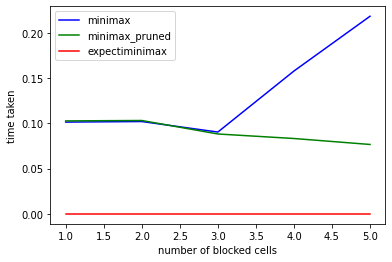

In [16]:
plt.plot(df_time.index, df_time['minimax'], label = 'minimax', color = 'blue')
plt.plot(df_time.index, df_time['minimax_pruned'], label = 'minimax_pruned', color = 'green')
plt.plot(df_time.index, df_time['expectiminimax'], label = 'expectiminimax', color = 'red')
plt.xlabel('number of blocked cells')
plt.ylabel('time taken')
plt.legend()
plt.show()

### Comment on time taken by the algorithms:
- The minimax algorithm theoretically takes more time than minimax with pruning
- Though here, as the search space is small due to more number of comparisons and assignments while updating alpha and beta minimax someimes takes lesser time, if the search space is increased it is expected pruning will take always lesser time **asymptotically**

In [17]:
df_nodes

,minimax,minimax_pruned,expectiminimax
blocked cells,,,
1,90000.0,69000.0,0.0
2,86000.0,66000.0,0.0
3,82000.0,63000.0,0.0
4,78000.0,60000.0,0.0
5,74000.0,57000.0,0.0


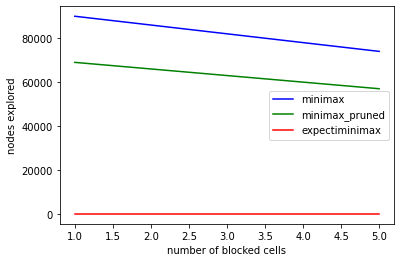

In [18]:
plt.plot(df_nodes.index, df_nodes['minimax'], label = 'minimax', color = 'blue')
plt.plot(df_nodes.index, df_nodes['minimax_pruned'], label = 'minimax_pruned', color = 'green')
plt.plot(df_nodes.index, df_nodes['expectiminimax'], label = 'expectiminimax', color = 'red')
plt.xlabel('number of blocked cells')
plt.ylabel('nodes explored')
plt.legend()
plt.show()

### Comment on Number of nodes explored by the algorithms:
- In the graph above and in the dataframes **cumulative explored nodes over 1000 worlds** were listed
- The Minimax Algorithm with pruning explored lesser number of nodes than the minimax algorithm
- The relative results for minimax and minimax with pruning are consistent with theory
- The expectiminimax is expected to show variable results due to its stochastic nature

In [22]:
for i in range(5):
  df_tree_size.loc[i+1, 'expectiminimax'] = 2**(24 - i)

In [23]:
df_tree_size

,minimax,minimax_pruned,expectiminimax
blocked cells,,,
1,16777216.0,16777216.0,16777216.0
2,8388608.0,8388608.0,8388608.0
3,4194304.0,4194304.0,4194304.0
4,2097152.0,2097152.0,2097152.0
5,1048576.0,1048576.0,1048576.0


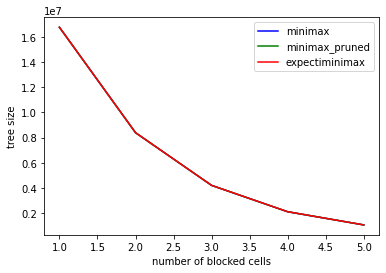

In [24]:
plt.plot(df_tree_size.index, df_tree_size['minimax'], label = 'minimax', color = 'blue')
plt.plot(df_tree_size.index, df_tree_size['minimax_pruned'], label = 'minimax_pruned', color = 'green')
plt.plot(df_tree_size.index, df_tree_size['expectiminimax'], label = 'expectiminimax', color = 'red')
plt.xlabel('number of blocked cells')
plt.ylabel('tree size')
plt.legend()
plt.show()

### Comment on tree Size:
- The tree size is independent of the algorithms, as it is basically the entire search state
- The various algorithms just reduce the search state, which is indicated by the number of nodes explored
- For **b** blocked cells, there will be (2)^(25- b) nodes in the game tree

# Problem 2: Solving Vehicle Routing Problem

Imagine you are running a logistics company using a single transport lorry. Your daily task involves scheduling deliveries for various customers spread across the city at different locations. Since, you always want to have the best customer feedback to grow your business, your aim is to perform all the deliveries to all the customers in the least possible time (this will also save your fuel cost). 

You also plan to use your AI expertise in your work, hence you plan to use Genetic Algorithm (GA) to find the best route across the city to perform the deliveries.

#### Typical GA flow:
1. Initialize a population.
2. Determine the fitness of all the individuals in the population.
3. Until **Done** repeat:
    1. Select parents.
    2. Perform crossover and mutation.
    3. Calculate the fitness of the new children.
    4. Append it to the gene pool.

## Questions
Five sets of problem instances each having 25 customer locations (X,Y) are provided for your implementation. Consider that it takes 1 unit of time to travel a unit distance.

Download Problem Instances: [routes.csv](https://drive.google.com/file/d/1JWLffb_5eJyiML81VtJF8ISV2le4QxMC/view?usp=sharing)

**Question 1**: Implement GA to find the most optimal route of customer deliveries with crossover probability as 0.5 and mutaion probability as 0.01 with a population size of 20. Operators to be used: [**20 marks**]
* Selection: Tournament selection
* Crossover: Partially Mapped Crossover (PMX) (to know more [click here](http://www.wardsystems.com/manuals/genehunter/crossover_of_enumerated_chromosomes.htm))
* Mutation: Single point mutation
Make your own decisions on the number of generation and report the same.
Print the fitness and the best route for all the problem instances. 

**Question 2**: Analyze the effect of increasing the crossover probability from the set - {0.5,0.6,0.7,0.8,0.9} and plot the fitness of the best solution for all the problem instances. Comment on the effect of crossover probability on GA performance. [**15 Marks**]

**Question 3**: Analyze the effect of increasing the mutation probability from the set -  {0.01,0.02,0.03,0.05,0.07} and plot the fitness of the best solution for all the problem instances. Comment on the effect of mutation probability on GA performance. [**15 Marks**]




### Hint
Take the sequence of points travelled by the vehicle as a chromosome.
Here the length of chromeosome will be 25 for all input instances. If the agent took path as 1,2,3,5,4,6,..... the chromosome will be of same sequence i.e. [1|2|3|5|4|6|....].
These chromosomes will then crossover and mutate accordingly and will produce new chromosomes with slightly altered sequencess.
Use fitness function to decide the fitness/suitability of a particular chromeosome and then repeat the experiment until the distance travelled by the sequence is low.

In [25]:
import random
random.seed(0)

In [26]:
df = pd.read_csv("routes_samples.csv")

In [27]:
df.columns = df.columns.str.strip()

In [28]:
df1 = df.iloc[:, [0, 1]]
df2 = df.iloc[:, [3, 4]]
df3 = df.iloc[:, [6, 7]]
df4 = df.iloc[:, [9, 10]]
df5 = df.iloc[:, [12, 13]]

In [29]:
def generate_population(num = 20):
  ##### initialization function
  random.seed(0)
  length_of_chromosome=25
  individual= np.arange(1, length_of_chromosome + 1)
  population = []
  for i in range(num):
    other_individual = individual.copy()
    random.shuffle(other_individual)
    population.append(other_individual)
  return population

In [30]:
def find_index(arr, ele): # finds 0-based location of ele in arr, algo used during pmx crossover
  ret_index = 0
  for i in range(len(arr)):
    if arr[i] == ele:
      ret_index = i
      return ret_index

In [31]:
def crossover(parentx, parenty, alpha):
  if random.random() <= alpha:
    length = len(parentx)
    left_end = random.randint(1, length-3)
    right_end = random.randint(left_end + 1, length - 2)
    child = np.zeros(length)
    
    index = left_end
    while index<=right_end:
      child[index] = parentx[index]
      index = index + 1
    
    index = left_end
    swap_elements = []
    while index<=right_end:
      element = parenty[index]
      flag = 1
      index2 = left_end
      while index2<=right_end:
        if child[index2] == element:
          flag = 0
          break
        index2 = index2 + 1
      if flag:
        swap_elements.append(element)
      index = index + 1
    
    for element in swap_elements:
      ind_y = 0
      while parenty[ind_y]!=element:
        ind_y = ind_y + 1
#       ind_x = ind_y
      while (ind_y>=left_end) and (ind_y<=right_end):
        ind_y = find_index(parenty, parentx[ind_y])
#         ind_x = ind_y
      child[ind_y] = element
    index = 0
    while index<length:
      if child[index] == 0:
        child[index] = parenty[index]
      index = index + 1
    return child
  return parentx

In [32]:
def mutation(parentx,beta):
  if random.random() <= beta:
    i, j = sample(range(len(parentx)), 2)
    temp = parentx[i]
    parentx[i] = parentx[j]
    parentx[j] = temp
  return parentx

In [33]:
def get_fitness(path, customers): # distance initial from 0th customer, which is fixed at start
  distance = abs(customers[int(path[0])][1] - customers[0][1]) + abs(customers[int(path[0])][0] - customers[0][0])
  n = len(path)
  for i in np.arange(0, n-1):
    distance += abs(customers[int(path[i+1])][1] - customers[int(path[i])][1]) + abs(customers[int(path[i+1])][0] - customers[int(path[i])][0])
  return -1*(distance)

In [34]:
def get_fitness_order(population, customers): # returns fitness order dictionary, with index and fitness value
  fitness_dict = {}
  for i in range(len(population)):
    fitness_dict[i] = get_fitness(population[i], customers)
  return dict(sorted(fitness_dict.items(), key=lambda item: item[1], reverse=True))

In [35]:
def nextgen(current_population,customers,alpha , beta): #produces next generation from population
  n = len(current_population)
  index_fitness_sorted = get_fitness_order(current_population, customers)
  order = list(index_fitness_sorted.keys())
  new_population = []
  i = 0
  while i<n:
    tournament_population = sample(list(np.arange(0, 20)), 10) # i will conduct 2 tournaments from populations of size 5 each
    tournament1_individuals = [current_population[i] for i in tournament_population[0:5]]
    tournament2_individuals = [current_population[i] for i in tournament_population[5:10]]
    index_fitness_sorted_t1 = get_fitness_order(tournament1_individuals, customers)
    order_t1 = list(index_fitness_sorted_t1.keys())
    index_fitness_sorted_t2 = get_fitness_order(tournament2_individuals, customers)
    order_t2 = list(index_fitness_sorted_t2.keys())
    parent1 = tournament1_individuals[order_t1[0]]
    parent2 = tournament2_individuals[order_t2[0]]
    
    child1 = crossover(parent1, parent2, alpha)
    child2 = crossover(parent2, parent1, alpha)
    
    child1 = mutation(child1, beta)
    child2 = mutation(child2, beta)
    new_population.append(child1)
    new_population.append(child2)
    i = i + 2
  return new_population

In [36]:
def run_algo(df1, alpha, beta, generation_num):
  start_population = generate_population()
  best_fitness_in_gen = []
  best_individual_in_gen = []
  current_population = start_population
  key_fitness_dict = get_fitness_order(current_population, df1.values)
  
  curr_best_fitness = list(key_fitness_dict.values())[0]
  best_fitness_in_gen.append(curr_best_fitness)
  
  current_best_individual = current_population[list(key_fitness_dict.keys())[0]]
  best_individual_in_gen.append(current_best_individual)
  
  for generation in range(generation_num):
    current_population = nextgen(current_population, df1.values, alpha = alpha, beta = beta)
    key_fitness_dict = get_fitness_order(current_population, df1.values)

    curr_best_fitness = list(key_fitness_dict.values())[0]
    best_fitness_in_gen.append(curr_best_fitness)

    current_best_individual = current_population[list(key_fitness_dict.keys())[0]]
    best_individual_in_gen.append(current_best_individual)
  return best_fitness_in_gen, best_individual_in_gen

In [37]:
# rough calculation to make fitness value positive
a = 0
for df in [df1, df2, df3, df4, df5]:
  a = max(abs(max(df.iloc[:, 0]) - min(df.iloc[:, 0])), a)
  a = max(abs(max(df.iloc[:, 1]) - min(df.iloc[:, 1])), a)
print(a)

86


In [38]:
a * 2 * 27

4644

In [39]:
def plot_graph(best_fitness_in_gen): # added offset of 5000 based on above rough calculation
  best_fitness_in_gen = [ele + 5000 for ele in best_fitness_in_gen] # scaling the values to positive
  plt.plot(list(np.arange(0,len(best_fitness_gen))), best_fitness_in_gen)
  plt.xlabel('number of generations')
  plt.ylabel('fitness value + 5000')
  plt.show()

# Note: Kindly reduce number of generations in below cells, to 1000(or 100 for even faster but suboptimal covergence) or so
# NOTE: First, kindly scroll through the results scrolling down and then run the further notebook for Problem 2, as running all remaning cells together with number of generations = 4000 may take more than half hour

## Y-axis has label fitness\*1e4 in some of the cells, it is actually (fitness + 5000), re-running would give correct label

### For Route  Stored in df1

In [39]:
best_fitness_gen, best_individual_in_gen = run_algo(df1, alpha=0.5, beta = 0.01, generation_num=4000)
best_found_path = best_individual_in_gen[best_fitness_gen.index(max(best_fitness_gen))]
print(f'best found path is {best_found_path}')
print(f'best fitness is {max(best_fitness_gen)}')

best found path is [ 5.  1. 17. 18. 19. 15. 13. 10.  7. 23. 21. 20. 22. 24. 25. 14. 16. 12.
 11.  9.  8.  6.  3.  4.  2.]
best fitness is -235


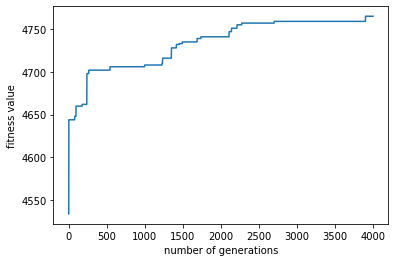

In [40]:
plot_graph(best_fitness_gen)

### For Route in df2

In [41]:
best_fitness_gen, best_individual_in_gen = run_algo(df2, alpha=0.5, beta = 0.01, generation_num=4000)
best_found_path = best_individual_in_gen[best_fitness_gen.index(max(best_fitness_gen))]
print(f'best found path is {best_found_path}')
print(f'best fitness is {max(best_fitness_gen)}')

best found path is [18. 16. 14. 19. 23. 24. 25. 10. 15. 21. 22.  2.  8.  9.  7.  5. 17. 13.
 11. 12. 20.  1.  3.  4.  6.]
best fitness is -265


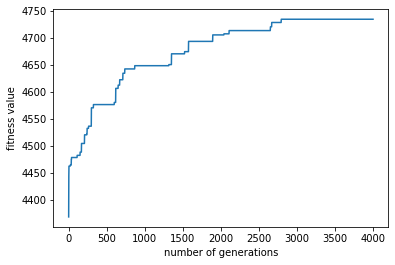

In [42]:
plot_graph(best_fitness_gen)

### For Route in df3

In [43]:
best_fitness_gen, best_individual_in_gen = run_algo(df3, alpha=0.5, beta = 0.01, generation_num=4000)
best_found_path = best_individual_in_gen[best_fitness_gen.index(max(best_fitness_gen))]
print(f'best found path is {best_found_path}')
print(f'best fitness is {max(best_fitness_gen)}')

best found path is [12. 21.  4. 24. 25. 23. 22. 15.  2. 13. 16. 14.  5.  6. 18.  1. 20.  9.
  3.  7. 11. 10. 19.  8. 17.]
best fitness is -465


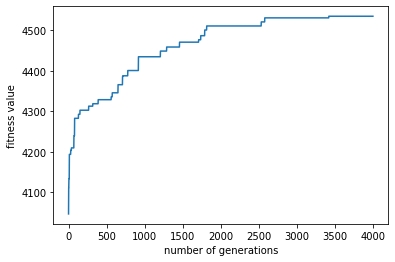

In [44]:
plot_graph(best_fitness_gen)

### For Route in df4

In [45]:
best_fitness_gen, best_individual_in_gen = run_algo(df4, alpha=0.5, beta = 0.01, generation_num = 4000)
best_found_path = best_individual_in_gen[best_fitness_gen.index(max(best_fitness_gen))]
print(f'best found path is {best_found_path}')
print(f'best fitness is {max(best_fitness_gen)}')

best found path is [12. 10.  9. 20. 19. 18. 23. 21. 25.  2.  4.  5.  8.  7. 11. 13. 15. 16.
 17. 14.  6.  3.  1. 24. 22.]
best fitness is -451


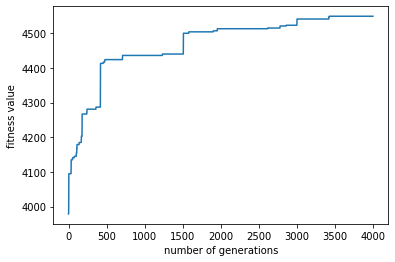

In [46]:
plot_graph(best_fitness_gen)

### For Route in df5

In [47]:
best_fitness_gen, best_individual_in_gen = run_algo(df5, alpha=0.5, beta = 0.01, generation_num=4000)
best_found_path = best_individual_in_gen[best_fitness_gen.index(max(best_fitness_gen))]
print(f'best found path is {best_found_path}')
print(f'best fitness is {max(best_fitness_gen)}')

best found path is [21. 18. 19. 22. 17.  1.  2.  3. 25. 23. 16. 15. 13. 14. 12. 11.  9.  8.
 24. 20.  4.  7.  6.  5. 10.]
best fitness is -627


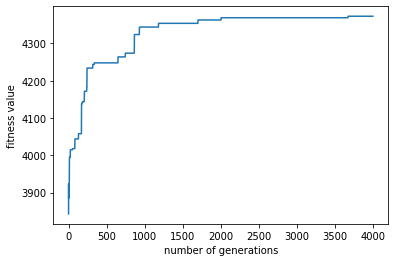

In [48]:
plot_graph(best_fitness_gen)

## Question 2:

### Plot of Cross-over rate vs Best Fitness for :

### Path in df1:

In [51]:
cross_over_rates = [0.5,0.6,0.7,0.8,0.9]
best_fitness_for_rate_df1 = []
for alpha in cross_over_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df1, alpha = alpha, beta = 0.01, generation_num=4000)
  best_fitness_for_rate_df1.append(max(best_fitness_gen))
scaled_best_fitness_df1 = [bf + 5000 for bf in best_fitness_for_rate_df1]

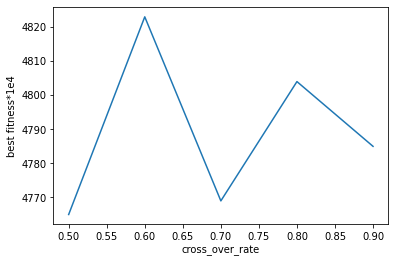

In [52]:
plt.plot(cross_over_rates, scaled_best_fitness_df1)
plt.xlabel('cross_over_rate')
plt.ylabel('best fitness+5000')
plt.show()

## Path in df2

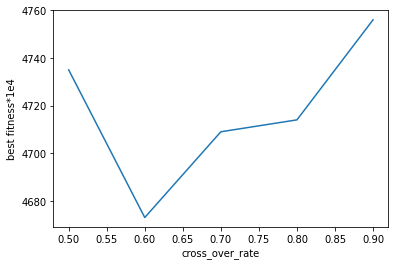

In [53]:
cross_over_rates = [0.5,0.6,0.7,0.8,0.9]
best_fitness_for_rate_df2 = []
for alpha in cross_over_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df2, alpha = alpha, beta = 0.01, generation_num=4000)
  best_fitness_for_rate_df2.append(max(best_fitness_gen))
scaled_best_fitness_df2 = [bf + 5000 for bf in best_fitness_for_rate_df2]
plt.plot(cross_over_rates, scaled_best_fitness_df2)
plt.xlabel('cross_over_rate')
plt.ylabel('best fitness+5000')
plt.show()

## In df3

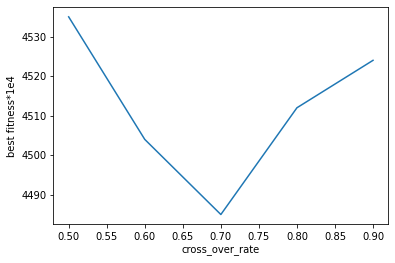

In [54]:
cross_over_rates = [0.5,0.6,0.7,0.8,0.9]
best_fitness_for_rate_df3 = []
for alpha in cross_over_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df3, alpha = alpha, beta = 0.01, generation_num=4000)
  best_fitness_for_rate_df3.append(max(best_fitness_gen))
scaled_best_fitness_df3 = [bf + 5000 for bf in best_fitness_for_rate_df3]
plt.plot(cross_over_rates, scaled_best_fitness_df3)
plt.xlabel('cross_over_rate')
plt.ylabel('best fitness+5000')
plt.show()

## in df4

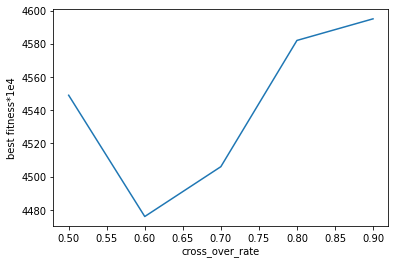

In [55]:
cross_over_rates = [0.5,0.6,0.7,0.8,0.9]
best_fitness_for_rate_df4 = []
for alpha in cross_over_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df4, alpha = alpha, beta = 0.01, generation_num=4000)
  best_fitness_for_rate_df4.append(max(best_fitness_gen))
scaled_best_fitness_df4 = [bf + 5000 for bf in best_fitness_for_rate_df4]
plt.plot(cross_over_rates, scaled_best_fitness_df4)
plt.xlabel('cross_over_rate')
plt.ylabel('best fitness+5000')
plt.show()

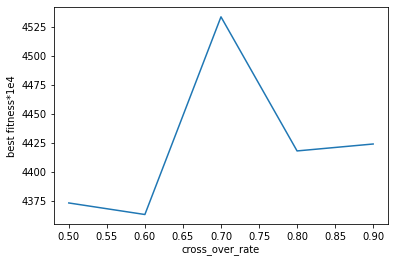

In [56]:
cross_over_rates = [0.5,0.6,0.7,0.8,0.9]
best_fitness_for_rate_df5 = []
for alpha in cross_over_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df5, alpha = alpha, beta = 0.01, generation_num=4000)
  best_fitness_for_rate_df5.append(max(best_fitness_gen))
scaled_best_fitness_df5 = [bf + 5000 for bf in best_fitness_for_rate_df5]
plt.plot(cross_over_rates, scaled_best_fitness_df5)
plt.xlabel('cross_over_rate')
plt.ylabel('best fitness+5000')
plt.show()

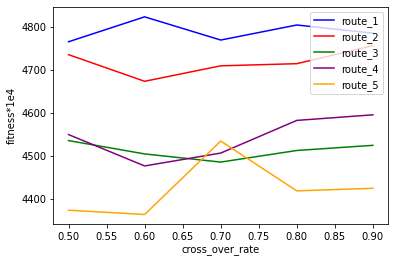

In [57]:
plt.plot(cross_over_rates, scaled_best_fitness_df1, label = 'route_1', color = 'blue')
plt.plot(cross_over_rates, scaled_best_fitness_df2, label = 'route_2', color = 'red')
plt.plot(cross_over_rates, scaled_best_fitness_df3, label = 'route_3', color = 'green')
plt.plot(cross_over_rates, scaled_best_fitness_df4, label = 'route_4', color = 'purple')
plt.plot(cross_over_rates, scaled_best_fitness_df5, label = 'route_5', color = 'orange')
plt.ylabel('fitness+5000')
plt.xlabel('cross_over_rate')
plt.legend(loc='upper right')
plt.show()

### Observations from above plot:
- Increasing cross-over probability doesn't seem to have a significant effect on optimal fitness value except for route-5
- Due to Random Nature of the algorithm, there is not much of a trend
- Though we can say all routes seem to have higher fitness at cross-over 0.80 than at 0.50
- So, we may say for the given population size cross-over rate of 0.8 is good

## Question 3:

In [58]:
mutation_rates = [0.01,0.02,0.03,0.05,0.07]
best_fitness_for_rate_df1m = []
for beta in mutation_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df1, alpha = 0.5, beta = beta, generation_num=4000)
  best_fitness_for_rate_df1m.append(max(best_fitness_gen))
scaled_best_fitness_df1m = [bf + 5000 for bf in best_fitness_for_rate_df1m]  

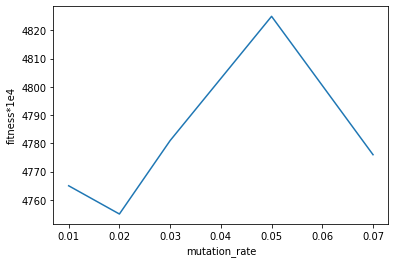

In [59]:
plt.plot(mutation_rates, scaled_best_fitness_df1m)
plt.xlabel('mutation_rate')
plt.ylabel('fitness+5000')
plt.show()

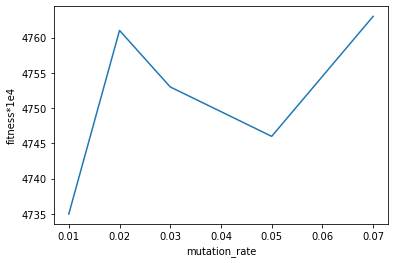

In [60]:
mutation_rates = [0.01,0.02,0.03,0.05,0.07]
best_fitness_for_rate_df2m = []
for beta in mutation_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df2, alpha = 0.5, beta = beta, generation_num=4000)
  best_fitness_for_rate_df2m.append(max(best_fitness_gen))
scaled_best_fitness_df2m = [bf + 5000 for bf in best_fitness_for_rate_df2m]  
plt.plot(mutation_rates, scaled_best_fitness_df2m)
plt.xlabel('mutation_rate')
plt.ylabel('fitness+5000')
plt.show()

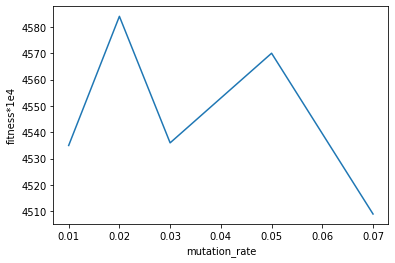

In [61]:
mutation_rates = [0.01,0.02,0.03,0.05,0.07]
best_fitness_for_rate_df3m = []
for beta in mutation_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df3, alpha = 0.5, beta = beta, generation_num=4000)
  best_fitness_for_rate_df3m.append(max(best_fitness_gen))
scaled_best_fitness_df3m = [bf + 5000 for bf in best_fitness_for_rate_df3m]  
plt.plot(mutation_rates, scaled_best_fitness_df3m)
plt.xlabel('mutation_rate')
plt.ylabel('fitness+5000')
plt.show()

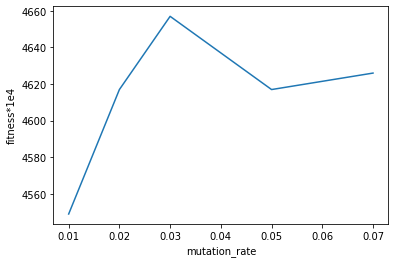

In [62]:
mutation_rates = [0.01,0.02,0.03,0.05,0.07]
best_fitness_for_rate_df4m = []
for beta in mutation_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df4, alpha = 0.5, beta = beta, generation_num=4000)
  best_fitness_for_rate_df4m.append(max(best_fitness_gen))
scaled_best_fitness_df4m = [bf + 5000 for bf in best_fitness_for_rate_df4m]  
plt.plot(mutation_rates, scaled_best_fitness_df4m)
plt.xlabel('mutation_rate')
plt.ylabel('fitness+5000')
plt.show()

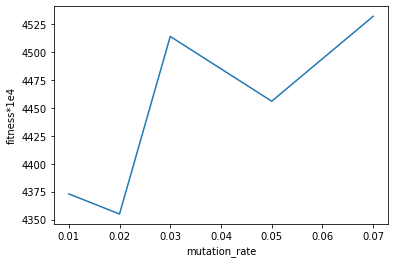

In [63]:
mutation_rates = [0.01,0.02,0.03,0.05,0.07]
best_fitness_for_rate_df5m = []
for beta in mutation_rates:
  best_fitness_gen, best_individual_in_gen = run_algo(df5, alpha = 0.5, beta = beta, generation_num=4000)
  best_fitness_for_rate_df5m.append(max(best_fitness_gen))
scaled_best_fitness_df5m = [bf + 5000 for bf in best_fitness_for_rate_df5m]  
plt.plot(mutation_rates, scaled_best_fitness_df5m)
plt.xlabel('mutation_rate')
plt.ylabel('fitness+5000')
plt.show()

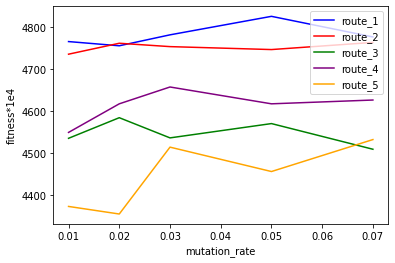

In [64]:
plt.plot(mutation_rates, scaled_best_fitness_df1m, label = 'route_1', color = 'blue')
plt.plot(mutation_rates, scaled_best_fitness_df2m, label = 'route_2', color = 'red')
plt.plot(mutation_rates, scaled_best_fitness_df3m, label = 'route_3', color = 'green')
plt.plot(mutation_rates, scaled_best_fitness_df4m, label = 'route_4', color = 'purple')
plt.plot(mutation_rates, scaled_best_fitness_df5m, label = 'route_5', color = 'orange')
plt.ylabel('fitness+5000')
plt.xlabel('mutation_rate')
plt.legend(loc='upper right')
plt.show()

### Observations from above plot:
- Here too due to random, non-deterministic nature of algorithm, there is no-observable trens
- According to theory if mutation rates are increased further to about 0.1 or 0.3 then the results may be severely sub-optimal
- We can take mutation rates for best fitness and the cross-over rates for best fitness for each route and run the algorithm, but then tpp nothing can be guaranteed due to non-determinism
- Route 5 was the most positievly affected by mutation rate of 0.07
- Whereas Route3 was slightly negatively affected with rate of 0.07

# Problem 3: Solving the Wordoku puzzle
In this problem, you will design an AI agent to solve the Wordoku puzzle. The core technique to focus on is the Constraint Satisfaction Problem (CSP). You will be implementing two methods to solve the Wordoku puzzle and compare the implementations. Wordoku is an extension of Sudoku
where we have alphabets in place of digits. Some basics about the CSP approach for solving the same
are given below. \

**Puzzle Background** \
The Wordoku puzzle has a 9x9 grid and a set of possible alphabets
with some of the positions filled with those alphabets to ensure a
solution can be reached. The goal is to find and fill remaining cells
with alphabets such that each row, column and the 3x3 square
(sub-grid) all must contain the alphabets, exactly once.
Note: There are exactly nine alphabets among which one of the
characters is needed to be filled in blank space.

Helping note:
Check the Alldiff constraints as discussed for the Sudoku puzzle.


The aim is to choose a value for each variable such that the resulting possible world satisfies the constraint.
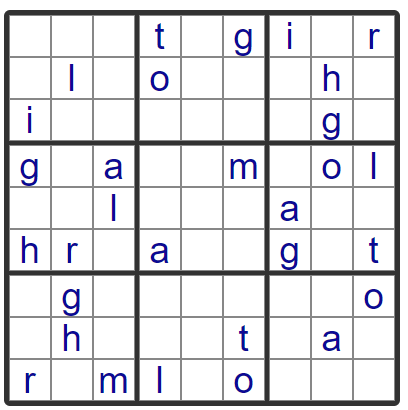
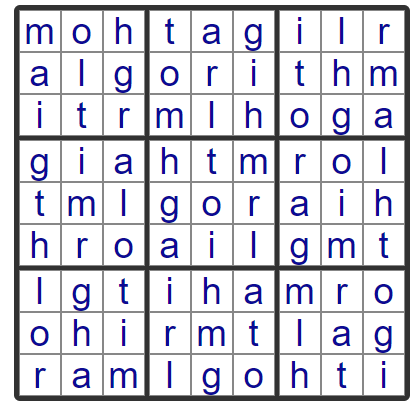

# Questions
**Question 1**: Implement the Backtracking Search with Constraint Propagation which can solve any Wordoku puzzle given as input. Mention your choice of heuristics in Backtracking Search. [**15 marks**]

**Question 2**: Implement the Min_Conflict Search which can solve any Wordoku puzzle given as input.
[**15 marks**]

**Question 3**: State the time and space complexity for each algorithm. Also, provide a table that compares performance of the above two algorithms for each 5 input cases.

Performance metrics: 
* The total clock time, 
* the search clock time, 
* the number of nodes generated

Analyze your results to see if the behaviour you expected has been achieved or not, and why.
[**10 marks**]

**Question 4**: Find all the possible meaningful words formed in any row, column or diagonal in each test case and list them in the output. (If none possible, mention ‘None’ in output) You may want to explore python libraries that can help you with finding meaningful words. [**10 marks**]

## Puzzle Input Format
\"*" denotes empty cells and letters denote the occupied cells.

\* D * * * * A G I \
\* * B * * H * E D \
\* * F * * E * * H \
\* H * * G * I A * \
\* E * * I * * C * \
\* A I * F * * D * \
C * * D * * G * * \
E G * A * * B * * \
I B H * * * * F * \

In [40]:
def world_init():
  wordoku=np.zeros([9,9],dtype = str)
  return wordoku
print(world_init())

[['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '']]


In [41]:
row_vals = ['* D * * * * A G I',
            '* * B * * H * E D',
            '* * F * * E * * H',
            '* H * * G * I A *',
            '* E * * I * * C *',
            '* A I * F * * D *',
            'C * * D * * G * *',
            'E G * A * * B * *',
            'I B H * * * * F *']

In [42]:
wordoku1 = world_init()

In [43]:
for i in range(9):
  wordoku1[i][:] = row_vals[i].split(sep = ' ')

In [44]:
print(wordoku1)

[['*' 'D' '*' '*' '*' '*' 'A' 'G' 'I']
 ['*' '*' 'B' '*' '*' 'H' '*' 'E' 'D']
 ['*' '*' 'F' '*' '*' 'E' '*' '*' 'H']
 ['*' 'H' '*' '*' 'G' '*' 'I' 'A' '*']
 ['*' 'E' '*' '*' 'I' '*' '*' 'C' '*']
 ['*' 'A' 'I' '*' 'F' '*' '*' 'D' '*']
 ['C' '*' '*' 'D' '*' '*' 'G' '*' '*']
 ['E' 'G' '*' 'A' '*' '*' 'B' '*' '*']
 ['I' 'B' 'H' '*' '*' '*' '*' 'F' '*']]


In [122]:
# global domain
# domain = list(np.unique(wordoku))
# domain.remove('*')

In [45]:
import copy

In [47]:
def count_stars(wordoku):
  count = 0
  for i in range(9):
    for j in range(9):
      if wordoku[i][j] == '*':
        count += 1
  return count

In [48]:
class wordoku_puzzle():
  def __init__(self, wordoku = None, all_domain = None, domain_dict = None, domain_size_list = None, checked = None):
    self.wordoku = wordoku
    self.all_domain = all_domain
    self.domain_dict = domain_dict
    self.domain_size_list = domain_size_list
    self.checked = checked
  def constraints(self, wordoku, letter, position):
    row = position[0]
    col = position[1]
    vertical_sub_grid_num = row//3
    horizontal_sub_grid_num = col//3
    sub_grid_rows = [(i + vertical_sub_grid_num) for i in range(3)]
    sub_grid_cols = [(i + horizontal_sub_grid_num) for i in range(3)]
    row_conflicts = 0
    col_conflicts = 0
    sub_grid_conflicts = 0 #sub_grid_conflicts not included in row or col conflicts
    for i in range(9):
      if (i!=col and wordoku[row][i] == letter):
        row_conflicts += 1
        return 1
      if (i!= row and wordoku[i][col] == letter):
        col_conflicts +=1
        return 1
    for i in sub_grid_rows:
      for j in sub_grid_cols:
        if (i!= row and wordoku[i][j] == letter) and j!=col:
          sub_grid_conflicts+=1
          return 1
    return row_conflicts + col_conflicts + sub_grid_conflicts      
  
  def form_domain_dict(self):
    self.all_domain = list(np.unique(self.wordoku))
    self.all_domain.remove('*')
    self.domain_dict = {}
    for i in range(9):
      for j in range(9):
        if self.wordoku[i][j] == '*':
          self.domain_dict[(i, j)] = []
          for letter in self.all_domain:
            if self.constraints(self.wordoku, letter, (i, j))==0:
              self.domain_dict[(i, j)].append(letter)
#     for position in list(self.domain_dict.keys()):
#       if len(self.domain_dict[position]) == 1:
#         self.wordoku[position[0]][position[1]] = self.domain_dict[position][0]
#         self.domain_dict.pop(position, None)
  def infer (self, domain, min_size_pos, value):
    wordoku = copy.deepcopy(self.wordoku)
    for position in domain.keys():
      if len(domain[position]) == 1:
        wordoku[position[0]][position[1]] = domain[position][0]
    
    row = min_size_pos[0]
    col = min_size_pos[1]
    
    for i in range(9):
      if (i != col and wordoku[row][i] == '*'):
        if value in domain[(row, i)]:
          domain[(row, i)].remove(value)
          if len(domain[(row, i)]) == 0:
            return {}
          if len(domain[(row, i)]) == 1:
            domain = self.infer(domain, (row, i), domain[(row, i)][0])
            if len(domain) == 0:
              return {}
      if (i != row and wordoku[i][col] == '*'):
        if value in domain[(i, col)]:
          domain[(i, col)].remove(value)
          if len(domain[(i, col)]) == 0:
            return {}
          if len(domain[(i, col)]) == 1:
            domain = self.infer(domain, (i, col), domain[(i, col)][0])
            if len(domain) == 0:
              return {}
    sub_grid_rows = [(i + row//3) for i in range(3)]
    sub_grid_cols = [(i + col//3) for i in range(3)]
    for i in sub_grid_rows:
      for j in sub_grid_cols:
        if ((i!=row) and (j!=col and wordoku[i][j] == '*')):
          if value in domain[(i, j)]:
            domain[(i, j)].remove(value)
            if len(domain[(i, j)]) == 0:
              return {}
            if len(domain[(i, j)]) == 1:
              domain = self.infer(domain, (i, j), domain[(i, j)][0])
              if len(domain) == 0:
                return {}
    return domain
  def backtracking_search(self):
    return self.backtrack(self.wordoku, self.domain_dict) #think abt whether assignment should be made class attribute
  
  def backtrack(self, wordoku, domain):
#     for position in domain.keys():
#       if len(domain[position]) == 1:
#         wordoku[position[0]][position[1]] = domain[position][0]
    
    if count_stars(wordoku) == 0:
      return domain
    
    min_dom_size = 100
    min_size_dom = None
    min_size_pos = None
    for k, v in domain.items():
      if wordoku[k[0]][k[1]] == '*':
        if (len(v) < min_dom_size):
          min_size_pos = k
          min_size_dom = v
          min_dom_size = len(v)

    for value in min_size_dom:
      if self.constraints(wordoku, value, min_size_pos) == 0:
        print(value, min_size_dom, min_size_pos)
        new_domain = copy.deepcopy(domain)
        new_domain[min_size_pos] = [value]
        wordoku[min_size_pos[0]][min_size_pos[1]] = value
        new_domain = self.infer(new_domain, min_size_pos, value)
        if len(new_domain)!=0:
          temp_new_domain = copy.deepcopy(new_domain)
          for position in temp_new_domain.keys():
            if len(temp_new_domain[position]) == 1:
              wordoku[position[0]][position[1]] = temp_new_domain[position][0]
        temp_domain = copy.deepcopy(new_domain)
        temp_wordoku = copy.deepcopy(wordoku)
        result = self.backtrack(wordoku, temp_domain)
        if result:
          return result
        else:
          wordoku[min_size_pos[0]][min_size_pos[1]] = '*'
    return {}
      

In [229]:
wordoku1

array([['*', 'D', '*', '*', '*', '*', 'A', 'G', 'I'],
       ['*', '*', 'B', '*', '*', 'H', '*', 'E', 'D'],
       ['*', '*', 'F', '*', '*', 'E', '*', '*', 'H'],
       ['*', 'H', '*', '*', 'G', '*', 'I', 'A', '*'],
       ['*', 'E', '*', '*', 'I', '*', '*', 'C', '*'],
       ['*', 'A', 'I', '*', 'F', '*', '*', 'D', '*'],
       ['C', '*', '*', 'D', '*', '*', 'G', '*', '*'],
       ['E', 'G', '*', 'A', '*', '*', 'B', '*', '*'],
       ['I', 'B', 'H', '*', '*', '*', '*', 'F', '*']], dtype='<U1')

In [230]:
temp1 = wordoku_puzzle(wordoku=wordoku1)

In [231]:
temp1.form_domain_dict()

In [232]:
print(temp1.domain_dict)

{(0, 0): ['H'], (0, 2): ['C', 'E'], (0, 3): ['C', 'E', 'H'], (0, 4): ['C', 'E', 'H'], (0, 5): ['C'], (1, 0): ['A', 'G'], (1, 1): ['C', 'I'], (1, 3): ['C', 'G', 'I'], (1, 4): ['A', 'C'], (1, 6): ['C'], (2, 0): ['A', 'G'], (2, 1): ['C', 'I'], (2, 3): ['C', 'G', 'I'], (2, 4): ['A', 'C'], (2, 6): ['C', 'D'], (2, 7): ['I'], (3, 0): ['D'], (3, 2): ['C', 'D', 'E'], (3, 3): ['C', 'E'], (3, 5): ['C', 'D'], (3, 8): ['C', 'E'], (4, 0): ['A', 'D', 'G'], (4, 2): ['A', 'D', 'G'], (4, 3): ['G'], (4, 5): ['A', 'D', 'G'], (4, 6): ['D', 'H'], (4, 8): ['A'], (5, 0): ['G'], (5, 3): ['C', 'E', 'G'], (5, 5): ['C', 'G'], (5, 6): ['C', 'E', 'H'], (5, 8): ['C', 'E'], (6, 1): ['I'], (6, 2): ['A'], (6, 4): ['A', 'B'], (6, 5): ['A', 'B', 'I'], (6, 7): ['B', 'H'], (6, 8): ['A', 'B', 'E'], (7, 2): ['C', 'D'], (7, 4): ['C', 'D'], (7, 5): ['C', 'D', 'I'], (7, 7): ['H'], (7, 8): ['C'], (8, 3): ['C', 'G'], (8, 4): ['A', 'C', 'D'], (8, 5): ['A', 'C', 'D', 'G'], (8, 6): ['C', 'D', 'E'], (8, 8): ['A', 'C', 'E']}


In [233]:
new_dict = temp1.backtracking_search()

H ['H'] (0, 0)
C ['C'] (0, 5)
C ['C'] (1, 6)
I ['I'] (2, 7)
D ['D'] (3, 0)
G ['G'] (4, 3)
A ['A'] (4, 8)
G ['G'] (5, 0)
I ['I'] (6, 1)
A ['A'] (6, 2)
H ['H'] (7, 7)
C ['C'] (7, 8)
E ['C', 'E'] (0, 2)
A ['A', 'G'] (1, 0)


In [234]:
new_dict

{}

In [227]:
temp1.wordoku

array([['*', 'D', '*', '*', '*', '*', 'A', 'G', 'I'],
       ['*', '*', 'B', '*', '*', 'H', '*', 'E', 'D'],
       ['*', '*', 'F', '*', '*', 'E', '*', '*', 'H'],
       ['*', 'H', '*', '*', 'G', '*', 'I', 'A', '*'],
       ['*', 'E', '*', '*', 'I', '*', '*', 'C', '*'],
       ['*', 'A', 'I', '*', 'F', '*', '*', 'D', '*'],
       ['C', '*', '*', 'D', '*', '*', 'G', '*', '*'],
       ['E', 'G', '*', 'A', '*', '*', 'B', '*', '*'],
       ['I', 'B', 'H', '*', '*', '*', '*', 'F', '*']], dtype='<U1')

In [ ]:
def min_conflict():
  #####
  # your code goes here. insert the min conflict code in this cell /
  #####
  pass

In [ ]:
def find_meaningful words():
  #####
  # your code goes here. implrt a dictionay and match the words in the rows, columns and diagonals /
  #####
  pass